In [1]:
## auxiliary function to download food safety data from ratings.food.gov.uk

import pandas as pd
from urllib.request import urlopen
import xml.etree.ElementTree as ET
from collections import OrderedDict
from io import StringIO

def download_foodsafety_data_and_convert_to_csv(xml_id='FHRS776en-GB.xml', out_fpath='food_safety.csv'):
    """
    Downloads food safety data given the local authority id which can be 
    found at http://ratings.food.gov.uk/open-data/en-GB 
    """
    url = 'http://ratings.food.gov.uk/OpenDataFiles/{}'.format(xml_id)
    response = urlopen(url)
    content = StringIO(response.read().decode())

    def get_info_from_xml():
        etree = ET.parse(content)
        root = etree.getroot()
        for enstab in root.iter('EstablishmentDetail'):
            d = OrderedDict()
            for item in enstab:
                if item.tag == 'Geocode':
                    for ll_info in item:
                        d[ll_info.tag] = float(ll_info.text)
                else:
                    d[item.tag] = item.text
            yield d

    df = pd.DataFrame(list(get_info_from_xml()))
    df.to_csv(out_fpath, index=None)
    
download_foodsafety_data_and_convert_to_csv(xml_id='FHRS776en-GB.xml', out_fpath='food_safety_Glasgow.csv')

# Pandas
The data analyst best friend. 

Learn more at https://pandas.pydata.org

In [2]:
import pandas as pd

## Reading in data
To load data into python use pandas's ```read_..``` methods. There are plenty of read methods for different file formats.

For loading data from excel..
```python
excel_file = pd.ExcelFile('path_to_excel.xlsx')
df = pd.read_excel(excel_file, 'Sheet1')
```
for other files try typing ```pd.read_``` and then hit the \<tab\> key

In [3]:
df_raw = pd.read_csv('food_safety_Glasgow.csv')

## Exploring data

In [4]:
# showing first 4 rows (if you don't pass a number the default is 5)
df_raw.head(4)

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine2,AddressLine3,PostCode,RatingValue,RatingKey,...,LocalAuthorityCode,LocalAuthorityName,LocalAuthorityWebSite,LocalAuthorityEmailAddress,Scores,SchemeType,NewRatingPending,Longitude,Latitude,AddressLine1
0,946085,15/00071/COM,(DC1) Donut Coffee (Supreme Group),Mobile caterer,7846,105 Clydeholm Road,Glasgow,G14 0QQ,Awaiting Inspection,fhis_awaiting_inspection_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.337705,55.870607,NaN
1,36328,10/00926/COM,(Nisa) News 24,Retailers - other,4613,68 Gordon Street,Glasgow,G1 3RS,Improvement Required,fhis_improvement_required_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.257722,55.860794,NaN
2,19429,06/00508/COM,(Starbucks),Restaurant/Cafe/Canteen,1,390 Provan Walk,Glasgow,G34 9DL,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.136909,55.872982,NaN
3,36363,10/01018/COM,1 Call Direct Staff Canteen,Restaurant/Cafe/Canteen,1,116 West Regent Street,Glasgow,G2 2QD,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.258732,55.863606,Storey Ground


In [5]:
# listing all the column names
df_raw.columns

Index(['FHRSID', 'LocalAuthorityBusinessID', 'BusinessName', 'BusinessType',
       'BusinessTypeID', 'AddressLine2', 'AddressLine3', 'PostCode',
       'RatingValue', 'RatingKey', 'RatingDate', 'LocalAuthorityCode',
       'LocalAuthorityName', 'LocalAuthorityWebSite',
       'LocalAuthorityEmailAddress', 'Scores', 'SchemeType',
       'NewRatingPending', 'Longitude', 'Latitude', 'AddressLine1'],
      dtype='object')

In [6]:
# showing the shape of the dataset (number of rows, number of columns)
df_raw.shape   

(5384, 21)

## Slicing data Positionally or by Label

getting a slice of the data
```python
.loc[index_name/s, column_names/s]       # by label
.iloc[index_number/s, column_numbers/s]  # by position

.loc[a:b] # includes both a and b (as they could be any type, e.g. strings)
.iloc[a:b] # includes only a
```

In [7]:
# since currently the index label coincides with the position, let's set some other column as the index
df = df_raw.set_index('FHRSID')
df.head(2)

,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine2,AddressLine3,PostCode,RatingValue,RatingKey,RatingDate,LocalAuthorityCode,LocalAuthorityName,LocalAuthorityWebSite,LocalAuthorityEmailAddress,Scores,SchemeType,NewRatingPending,Longitude,Latitude,AddressLine1
FHRSID,,,,,,,,,,,,,,,,,,,,
946085,15/00071/COM,(DC1) Donut Coffee (Supreme Group),Mobile caterer,7846,105 Clydeholm Road,Glasgow,G14 0QQ,Awaiting Inspection,fhis_awaiting_inspection_en-GB,2017-02-07,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.337705,55.870607,NaN
36328,10/00926/COM,(Nisa) News 24,Retailers - other,4613,68 Gordon Street,Glasgow,G1 3RS,Improvement Required,fhis_improvement_required_en-GB,2018-12-07,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.257722,55.860794,NaN


In [8]:
# df[xx] by default gets you column/s
df[['RatingValue', 'Longitude']].head()

,RatingValue,Longitude
FHRSID,,
946085,Awaiting Inspection,-4.337705
36328,Improvement Required,-4.257722
19429,Pass,-4.136909
36363,Pass,-4.258732
779621,Pass,-4.256026


In [9]:
df.iloc[2]      # by Position: getting the 3th line, all columns

LocalAuthorityBusinessID                    06/00508/COM
BusinessName                                 (Starbucks)
BusinessType                     Restaurant/Cafe/Canteen
BusinessTypeID                                         1
AddressLine2                             390 Provan Walk
AddressLine3                                     Glasgow
PostCode                                         G34 9DL
RatingValue                                         Pass
RatingKey                                fhis_pass_en-GB
RatingDate                                    2015-11-12
LocalAuthorityCode                                   776
LocalAuthorityName                          Glasgow City
LocalAuthorityWebSite          http://www.glasgow.gov.uk
LocalAuthorityEmailAddress    food.safety@glasgow.gov.uk
Scores                                               NaN
SchemeType                                          FHIS
NewRatingPending                                   False
Longitude                      

In [10]:
df.loc[19429]   # by Label: getting the line with index named 19429, all columns

LocalAuthorityBusinessID                    06/00508/COM
BusinessName                                 (Starbucks)
BusinessType                     Restaurant/Cafe/Canteen
BusinessTypeID                                         1
AddressLine2                             390 Provan Walk
AddressLine3                                     Glasgow
PostCode                                         G34 9DL
RatingValue                                         Pass
RatingKey                                fhis_pass_en-GB
RatingDate                                    2015-11-12
LocalAuthorityCode                                   776
LocalAuthorityName                          Glasgow City
LocalAuthorityWebSite          http://www.glasgow.gov.uk
LocalAuthorityEmailAddress    food.safety@glasgow.gov.uk
Scores                                               NaN
SchemeType                                          FHIS
NewRatingPending                                   False
Longitude                      

In [11]:
df.iloc[3:5]    # getting from line 3 to line 5, all columns

,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine2,AddressLine3,PostCode,RatingValue,RatingKey,RatingDate,LocalAuthorityCode,LocalAuthorityName,LocalAuthorityWebSite,LocalAuthorityEmailAddress,Scores,SchemeType,NewRatingPending,Longitude,Latitude,AddressLine1
FHRSID,,,,,,,,,,,,,,,,,,,,
36363,10/01018/COM,1 Call Direct Staff Canteen,Restaurant/Cafe/Canteen,1,116 West Regent Street,Glasgow,G2 2QD,Pass,fhis_pass_en-GB,2015-11-20,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.258732,55.863606,Storey Ground
779621,15/00460/COM,1 Level Up,Restaurant/Cafe/Canteen,1,34 St Enoch Square,Glasgow,G1 4DF,Pass,fhis_pass_en-GB,2015-07-24,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.256026,55.857455,Storey 1/2


In [12]:
# using mixed position and label query
df.loc[df.index[3:5], 'RatingValue']  # getting from line 3 to line 5, only 'RatingValue' column
# or 
df.iloc[3:5]['RatingValue']

FHRSID
36363     Pass
779621    Pass
Name: RatingValue, dtype: object

### Logical selection

In [13]:
df[ df['BusinessName'] == 'Starbucks']

,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine2,AddressLine3,PostCode,RatingValue,RatingKey,RatingDate,LocalAuthorityCode,LocalAuthorityName,LocalAuthorityWebSite,LocalAuthorityEmailAddress,Scores,SchemeType,NewRatingPending,Longitude,Latitude,AddressLine1
FHRSID,,,,,,,,,,,,,,,,,,,,
948437,17/00122/COM,Starbucks,Restaurant/Cafe/Canteen,1,50 Allerdyce Road,Glasgow,G15 6RX,Pass,fhis_pass_en-GB,2019-09-24,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.377490,55.905094,NaN
128339,58270/0027/0/000,Starbucks,Restaurant/Cafe/Canteen,1,27 Sauchiehall Street,Glasgow,G2 3AT,Pass,fhis_pass_en-GB,2013-09-23,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.254819,55.864208,NaN
15081,05/00103/COM,Starbucks,Restaurant/Cafe/Canteen,1,140 Buchanan Street,Glasgow,G1 2JR,Pass,fhis_pass_en-GB,2010-09-15,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.253480,55.861501,NaN
1174284,19/00670/COM,Starbucks,Restaurant/Cafe/Canteen,1,55 St Enoch Square,Glasgow,G1 4BW,Pass,fhis_pass_en-GB,2019-09-18,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.254458,55.857412,Unit 32B


In [14]:
df[ df['BusinessName'].str.contains('Starbucks') ]

,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine2,AddressLine3,PostCode,RatingValue,RatingKey,RatingDate,LocalAuthorityCode,LocalAuthorityName,LocalAuthorityWebSite,LocalAuthorityEmailAddress,Scores,SchemeType,NewRatingPending,Longitude,Latitude,AddressLine1
FHRSID,,,,,,,,,,,,,,,,,,,,
19429,06/00508/COM,(Starbucks),Restaurant/Cafe/Canteen,1,390 Provan Walk,Glasgow,G34 9DL,Pass,fhis_pass_en-GB,2015-11-12,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.136909,55.872982,NaN
785113,15/00464/COM,Cineworld Cinemas And Starbucks,Takeaway/sandwich shop,7844,763 Barrhead Road,Glasgow,G53 6AF,Awaiting Inspection,fhis_awaiting_inspection_en-GB,2015-07-27,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.342073,55.822897,Unit 42 - Cinema
948437,17/00122/COM,Starbucks,Restaurant/Cafe/Canteen,1,50 Allerdyce Road,Glasgow,G15 6RX,Pass,fhis_pass_en-GB,2019-09-24,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.377490,55.905094,NaN
128339,58270/0027/0/000,Starbucks,Restaurant/Cafe/Canteen,1,27 Sauchiehall Street,Glasgow,G2 3AT,Pass,fhis_pass_en-GB,2013-09-23,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.254819,55.864208,NaN
15081,05/00103/COM,Starbucks,Restaurant/Cafe/Canteen,1,140 Buchanan Street,Glasgow,G1 2JR,Pass,fhis_pass_en-GB,2010-09-15,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.253480,55.861501,NaN
1174284,19/00670/COM,Starbucks,Restaurant/Cafe/Canteen,1,55 St Enoch Square,Glasgow,G1 4BW,Pass,fhis_pass_en-GB,2019-09-18,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.254458,55.857412,Unit 32B
79750,19220/0254/0/000,Starbucks Coffee,Restaurant/Cafe/Canteen,1,254 Byres Road,Glasgow,G12 8SH,Pass,fhis_pass_en-GB,2014-06-09,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.293324,55.875370,NaN
31176,09/00568/COM,Starbucks Coffee,Restaurant/Cafe/Canteen,1,38 George Square,Glasgow,NaN,Pass,fhis_pass_en-GB,2013-10-29,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.250945,55.860849,NaN
98562,31070/0009/0/000,Starbucks Coffee,Restaurant/Cafe/Canteen,1,9 Exchange Place,Glasgow,G1 3AN,Pass,fhis_pass_en-GB,2010-09-15,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.253746,55.860022,NaN


In [15]:
df[ df['Longitude']<50 ]

,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine2,AddressLine3,PostCode,RatingValue,RatingKey,RatingDate,LocalAuthorityCode,LocalAuthorityName,LocalAuthorityWebSite,LocalAuthorityEmailAddress,Scores,SchemeType,NewRatingPending,Longitude,Latitude,AddressLine1
FHRSID,,,,,,,,,,,,,,,,,,,,
946085,15/00071/COM,(DC1) Donut Coffee (Supreme Group),Mobile caterer,7846,105 Clydeholm Road,Glasgow,G14 0QQ,Awaiting Inspection,fhis_awaiting_inspection_en-GB,2017-02-07,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.337705,55.870607,NaN
36328,10/00926/COM,(Nisa) News 24,Retailers - other,4613,68 Gordon Street,Glasgow,G1 3RS,Improvement Required,fhis_improvement_required_en-GB,2018-12-07,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.257722,55.860794,NaN
19429,06/00508/COM,(Starbucks),Restaurant/Cafe/Canteen,1,390 Provan Walk,Glasgow,G34 9DL,Pass,fhis_pass_en-GB,2015-11-12,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.136909,55.872982,NaN
36363,10/01018/COM,1 Call Direct Staff Canteen,Restaurant/Cafe/Canteen,1,116 West Regent Street,Glasgow,G2 2QD,Pass,fhis_pass_en-GB,2015-11-20,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.258732,55.863606,Storey Ground
779621,15/00460/COM,1 Level Up,Restaurant/Cafe/Canteen,1,34 St Enoch Square,Glasgow,G1 4DF,Pass,fhis_pass_en-GB,2015-07-24,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.256026,55.857455,Storey 1/2
612666,13/00979/COM,1 Stop News,Retailers - other,4613,366 Cumbernauld Road,Glasgow,G31 3NQ,Awaiting Inspection,fhis_awaiting_inspection_en-GB,2013-11-19,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.205416,55.862444,NaN
1152792,19/00248/COM,100 Fusion Food Supermarket,Retailers - other,4613,186 Trongate,Glasgow,NaN,Pass,fhis_pass_en-GB,2019-06-21,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.248843,55.857583,NaN
96596,29500/0310/0/000,101 Convenience Store,Retailers - other,4613,310 Dyke Road,Glasgow,G13 4QU,Pass,fhis_pass_en-GB,2010-07-01,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.365896,55.892573,NaN
124676,53150/1587/0/000,101 Convenience Store,Retailers - other,4613,1587 Paisley Road West,Glasgow,G52 3QY,Pass,fhis_pass_en-GB,2010-07-07,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.334799,55.845910,NaN


So in short.. there are many ways to explore the data. 

Some of the simplest are:

```python
    df             # showing the "full" dataset
    df.shape       # checking the size of the dataset
    df.head(2)     # looking at first 2 rows. For last rows use df.tail()
    df['Latitude'] # look for a specific column
    df[mymask]     # use a row-based mask to extract information
    df.loc[639]    # grabbing a sample row (using index label) 
    df.iloc[639]   # grabbing a sample row (using integer-location index)
    df.columns     # looking at all column names
    df.info()      # summary non-nulls and types for each column
    df.describe()  # basic statistics (only for the numeric columns)
    
    df.describe().loc['25%', Latitude]   # go query-crazy
```

## Performing math

In [16]:
subset = df.loc[df.index[:3], 'Latitude']
subset

FHRSID
946085    55.870607
36328     55.860794
19429     55.872982
Name: Latitude, dtype: float64

In [17]:
(subset + 100) * 2

FHRSID
946085    311.741214
36328     311.721588
19429     311.745964
Name: Latitude, dtype: float64

## Plotting

In [18]:
# remember to activate the inline option to see the plot inside the notebook
%matplotlib inline

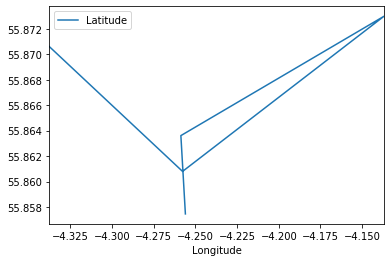

In [19]:
# line plot
df.iloc[:5].plot(x='Longitude', y='Latitude')

# same as
# df.iloc[:5].plot.line(x='Longitude', y='Latitude')

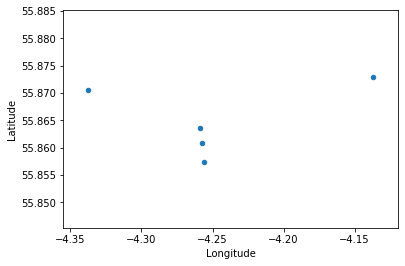

In [20]:
# scatter plot
df.iloc[:5].plot.scatter(x='Longitude', y='Latitude')

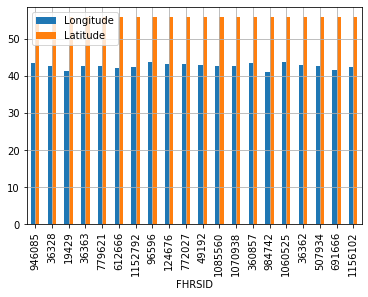

In [21]:
# bar plot

y = df.iloc[:20][['Longitude', 'Latitude']]
y['Longitude'] = -10*y['Longitude']

y.plot.bar(grid=True)